In [2]:
# KNN (K-Nearest-Neighbors)
import pandas as pd 
import numpy as np

#criando os dados para predizer a nota do filme usando KNN
r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('u.data', sep='\t', names = r_cols,usecols=range(3))
ratings.head()

,user_id,movie_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


KNN EXAMPLE

In [8]:
# agrupando filmes e calculando a media de classificações (media)
movieProperties = ratings.groupby('movie_id').agg({'rating': [np.size, np.mean]})
movieProperties.head()

C:\Users\willi\AppData\Local\Temp\ipykernel_18420\3273524163.py:2: FutureWarning: The provided callable <function mean at 0x0000018B770AD3A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  movieProperties = ratings.groupby('movie_id').agg({'rating': [np.size, np.mean]})


rating          
           size      mean
movie_id                 
1           452  3.878319
2           131  3.206107
3            90  3.033333
4           209  3.550239
5            86  3.302326

In [9]:
# calculando as classificações usando o valor maximo e minimo de cada filme
movieNumratings = pd.DataFrame(movieProperties['rating']['size'])
movieNormalizedNumRatings = movieNumratings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
movieNormalizedNumRatings.head()

,size
movie_id,
1,0.773585
2,0.222985
3,0.152659
4,0.356775
5,0.145798


In [10]:
movieDict = {}
with open(r'u.item') as f: # nome e generos dos filmes 
    temp = ''
    for line in f: # pega cada linha do arqv
        fields = line.rstrip('\n').split('|')
        # salvando o nome, genero e id 
        movieID = int(fields[0])
        name = fields[1]
        genres = fields[5:25]
        genres = map(int, genres)
        movieDict[movieID] = (name, np.array(list(genres)), movieNormalizedNumRatings.loc[movieID].get('size'), movieProperties.loc[movieID].rating.get('mean'))


In [11]:
movieDict[1]

('Toy Story (1995)',
 array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 0.7735849056603774,
 3.8783185840707963)

In [12]:
from scipy import spatial

# vai calcular a 'distancia' entre dois filmes 
def ComputeDistance(a, b):
    genresA = a[1]
    genresB = b[1]
    genreDistance = spatial.distance.cosine(genresA, genresB)
    popularityA = a[2]
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB)
    return genreDistance + popularityDistance

# distancia entre o filme id 2 e filme id 4
ComputeDistance(movieDict[2], movieDict[4])

0.8004574042309892

In [14]:
print( movieDict[2]) # exibindo qual e o filme 2 
print( movieDict[4]) # exibindo qual e o filme 4 

('GoldenEye (1995)', array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), 0.22298456260720412, 3.2061068702290076)
('Get Shorty (1995)', array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 0.3567753001715266, 3.550239234449761)


In [16]:
import operator

# função para pegar um id de filme e encontar os k vizinhos mais proximos
def getNeighbors(movieID, K):
    distances = []
    for movie in movieDict:
        if (movie != movieID):
            dist = ComputeDistance(movieDict[movieID], movieDict[movie])
            distances.append((movie, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors

K = 10 # 10 vizinhos mais proximos 
avgRating = 0
neighbors = getNeighbors(1, K) # encontrando os 10 vizinhos mais proximos de filmeid 1 
# calcular a media de classificação de cada vizinho 
for neighbor in neighbors:
    avgRating += movieDict[neighbor][3]
    print (movieDict[neighbor][0] + " " + str(movieDict[neighbor][3]))
    
avgRating /= K

Liar Liar (1997) 3.156701030927835
Aladdin (1992) 3.8127853881278537
Willy Wonka and the Chocolate Factory (1971) 3.6319018404907975
Monty Python and the Holy Grail (1974) 4.0664556962025316
Full Monty, The (1997) 3.926984126984127
George of the Jungle (1997) 2.685185185185185
Beavis and Butt-head Do America (1996) 2.7884615384615383
Birdcage, The (1996) 3.4436860068259385
Home Alone (1990) 3.0875912408759123
Aladdin and the King of Thieves (1996) 2.8461538461538463


In [17]:
avgRating # classificação prevista 

3.3445905900235564

In [18]:
movieDict[1]

('Toy Story (1995)',
 array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 0.7735849056603774,
 3.8783185840707963)

## Dimensionality Reduction
## Principal Component Analysis (PCA)

In [21]:
from sklearn.datasets import load_iris # usando um conjunto de dados de flores da biblioteca scikit-learn
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

iris = load_iris() # carregando o dataset 

numSamples, numFeatures = iris.data.shape # numero de pontos de dados
print(numSamples)
print(numFeatures)
print(list(iris.target_names))

150
4
['setosa', 'versicolor', 'virginica']


In [22]:
X = iris.data
pca = PCA(n_components=2, whiten=True).fit(X) # aplicando o modulo de PCA (para reduzi 4 dimensoes para 2)
X_pca = pca.transform(X)

In [23]:
print(pca.components_) # imprimindo resultados

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


In [26]:
# mostrando a relação de variação
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.92461872 0.05306648]
0.9776852063187963


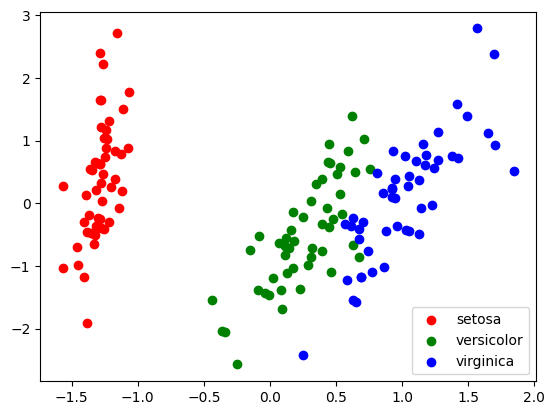

In [25]:
%matplotlib inline
from pylab import *

# fazendo um diagrma de dispersão 
colors = cycle('rgb')
target_ids = range(len(iris.target_names))
pl.figure()
for i, c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 1],
        c=c, label=label)
pl.legend()
pl.show()

# Reinforcement Learning & Q-Learning 

In [62]:
import gym
import random

random.seed(1234)
# Cria o ambiente "Taxi-v3" usando a biblioteca Gym e define o modo de renderização como 'ansi' para exibição em texto
streets = gym.make("Taxi-v3", render_mode = 'ansi').env 
streets.reset()
print("\n" + streets.render())


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




Our little world here, which we've called "streets", is a 5x5 grid. The state of this world at any time can be defined by:

-  Where the taxi is (one of 5x5 = 25 locations)
-  What the current destination is (4 possibilities)
-  Where the passenger is (5 possibilities: at one of the destinations, or inside the taxi)

So there are a total of 25 x 4 x 5 = 500 possible states that describe our world.

For each state, there are six possible actions:

-  Move South, East, North, or West
-  Pickup a passenger
-  Drop off a passenger

Q-Learning will take place using the following rewards and penalties at each state:

-  A successfull drop-off yields +20 points
-  Every time step taken while driving a passenger yields a -1 point penalty
-  Picking up or dropping off at an illegal location yields a -10 point penalty

Moving across a wall just isn't allowed at all.

Let's define an initial state, with the taxi at location (2, 3), the passenger at pickup location 2, and the destination at location 0:

In [63]:
# Codifica o estado inicial do ambiente 'streets'
initial_state = streets.encode(2, 3, 2, 0)

streets.s = initial_state # Define o estado inicial do ambiente 'streets' para o valor codificado.
streets.reset()# Reseta o ambiente 'streets'
print("\n" + streets.render()) # Renderiza o ambiente 'streets' e imprime o estado atual.


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [64]:
streets.P[initial_state] # tabela de recompensas

{0: [(1.0, 368, -1, False)],
 1: [(1.0, 168, -1, False)],
 2: [(1.0, 288, -1, False)],
 3: [(1.0, 248, -1, False)],
 4: [(1.0, 268, -10, False)],
 5: [(1.0, 268, -10, False)]}

In [65]:
import numpy as np
import random
import gym

# Cria o ambiente
streets = gym.make("Taxi-v3", render_mode='ansi').env

# Cria a tabela Q com zeros
q_table = np.zeros([streets.observation_space.n, streets.action_space.n])

# Define os hiperparâmetros
learning_rate = 0.1
discount_factor = 0.6
exploration = 0.1
epochs = 10000

# Loop de treinamento
for taxi_run in range(epochs):
    state = streets.reset()  # Obtém o estado inicial
    if isinstance(state, tuple):
        state = state[0] 
    done = False
    
    while not done:
        random_value = random.uniform(0, 1)
        if random_value < exploration:
            action = streets.action_space.sample()  # Explora uma ação aleatória
        else:
            action = np.argmax(q_table[state])  # Usa a ação com o maior valor Q
        
        next_state, reward, done, truncated, info = streets.step(action)  # Executa a ação e obtém o próximo estado e recompensa
        if isinstance(next_state, tuple):
            next_state = next_state[0]  
        
        prev_q = q_table[state, action]
        next_max_q = np.max(q_table[next_state])
        new_q = (1 - learning_rate) * prev_q + learning_rate * (reward + discount_factor * next_max_q)
        q_table[state, action] = new_q
        
        state = next_state  # Atualiza o estado atual

In [66]:
q_table[initial_state] # tabela de Q - valores

array([-2.42068845, -2.40506844, -2.42056208, -2.3639511 , -6.79066189,
       -8.0843933 ])

# K-Fold Cross Validation 

In [1]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import datasets
from sklearn import svm

# carregando o data set 
iris = datasets.load_iris()

In [2]:
# Dividindo os dados em conjuntos de treinamento/teste com 40% reservados para teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

# Criando um modelo SVC para prever classificações usando dados de treinamento
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

# medindo o desempenho com os dados de teste
clf.score(X_test, y_test)   

0.9666666666666667

In [3]:
# passando para 'cross_val_score' um modelo, todo o conjunto de dados e seus valores "reais" e o número de dobras:
scores = cross_val_score(clf, iris.data, iris.target, cv=5)

# Imprimindo a precisão individual:
print(scores)

# média de todas as 5:
print(scores.mean())

[0.96666667 1.         0.96666667 0.96666667 1.        ]
0.9800000000000001


In [4]:
# modelo SVC para prever classificações usando dados de treinamento
clf = svm.SVC(kernel='poly', C=1).fit(X_train, y_train)

# medindo o desempenho com os dados de teste
clf.score(X_test, y_test)

0.9

# Cleaning Your Data

In [5]:
import re

# controi o que é chamado de expressão regular 
format_pat= re.compile(
    r"(?P<host>[\d\.]+)\s"
    r"(?P<identity>\S*)\s"
    r"(?P<user>\S*)\s"
    r"\[(?P<time>.*?)\]\s"
    r'"(?P<request>.*?)"\s'
    r"(?P<status>\d+)\s"
    r"(?P<bytes>\S*)\s"
    r'"(?P<referer>.*?)"\s'
    r'"(?P<user_agent>.*?)"\s*'
)


In [6]:
logPath = "access_log.txt"

In [7]:
URLCounts = {}

with open(logPath, "r") as f:
    for line in (l.rstrip() for l in f):
        match = format_pat.match(line)
        if match:
            access = match.groupdict()
            request = access['request']
            
            # Verificar se a linha possui a estrutura esperada antes de dividir
            if ' ' in request:
                (action, URL, protocol) = request.split(' ', 2)
                
                if URL in URLCounts:
                    URLCounts[URL] += 1
                else:
                    URLCounts[URL] = 1

# Ordenar os resultados por contagem decrescente
results = sorted(URLCounts, key=lambda i: URLCounts[i], reverse=True)

# Imprimir os 20 URLs mais frequentes
for result in results[:20]:
    print(result + ": " + str(URLCounts[result]))

/xmlrpc.php: 68494
/wp-login.php: 1923
/: 440
/blog/: 138
/robots.txt: 123
/sitemap_index.xml: 118
/post-sitemap.xml: 118
/page-sitemap.xml: 117
/category-sitemap.xml: 117
/orlando-headlines/: 95
/san-jose-headlines/: 85
http://51.254.206.142/httptest.php: 81
/comics-2/: 76
/travel/: 74
/entertainment/: 72
/business/: 70
/national/: 70
/national-headlines/: 70
/world/: 70
/weather/: 70


In [8]:
URLCounts = {}

with open(logPath, "r") as f:
    for line in (l.rstrip() for l in f):
        match= format_pat.match(line)
        if match:
            access = match.groupdict()  # Extrai os grupos de captura nomeados como um dicionário
            request = access['request']
            fields = request.split() # Divide a solicitação em campos separados
            if (len(fields) != 3):
                print(fields)

['_\\xb0ZP\\x07tR\\xe5']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [9]:
URLCounts = {}

with open(logPath, "r") as f:
    for line in (l.rstrip() for l in f):
        match= format_pat.match(line)
        if match:
            access = match.groupdict() # Extrai os grupos de captura nomeados como um dicionário
            request = access['request']
            fields = request.split()
            if (len(fields) == 3): # Verifica se a solicitação contém exatamente três campos
                URL = fields[1]  # Extrai o URL do segundo campo da solicitação
                if URL in URLCounts:
                    URLCounts[URL] = URLCounts[URL] + 1
                else:
                    URLCounts[URL] = 1

# Ordena os URLs pelo número de acessos
results = sorted(URLCounts, key=lambda i: int(URLCounts[i]), reverse=True)


# Imprime os 20 URLs mais acessados
for result in results[:20]:
    print(result + ": " + str(URLCounts[result]))

/xmlrpc.php: 68494
/wp-login.php: 1923
/: 440
/blog/: 138
/robots.txt: 123
/sitemap_index.xml: 118
/post-sitemap.xml: 118
/page-sitemap.xml: 117
/category-sitemap.xml: 117
/orlando-headlines/: 95
/san-jose-headlines/: 85
http://51.254.206.142/httptest.php: 81
/comics-2/: 76
/travel/: 74
/entertainment/: 72
/business/: 70
/national/: 70
/national-headlines/: 70
/world/: 70
/weather/: 70


In [10]:
# semelhante ao anterior, mas com uma verificação adicional para garantir que a ação da solicitação seja 'GET' antes de contar o URL.
URLCounts = {}

with open(logPath, "r") as f:
    for line in (l.rstrip() for l in f):
        match= format_pat.match(line)
        if match:
            access = match.groupdict()
            request = access['request']
            fields = request.split()
            if (len(fields) == 3):
                (action, URL, protocol) = fields
                if (action == 'GET'):
                    if URL in URLCounts:
                        URLCounts[URL] = URLCounts[URL] + 1
                    else:
                        URLCounts[URL] = 1

results = sorted(URLCounts, key=lambda i: int(URLCounts[i]), reverse=True)

for result in results[:20]:
    print(result + ": " + str(URLCounts[result]))

/: 434
/blog/: 138
/robots.txt: 123
/sitemap_index.xml: 118
/post-sitemap.xml: 118
/page-sitemap.xml: 117
/category-sitemap.xml: 117
/orlando-headlines/: 95
/san-jose-headlines/: 85
http://51.254.206.142/httptest.php: 81
/comics-2/: 76
/travel/: 74
/entertainment/: 72
/business/: 70
/national/: 70
/national-headlines/: 70
/world/: 70
/weather/: 70
/about/: 69
/defense-sticking-head-sand/: 69


In [11]:
UserAgents = {}

with open(logPath, "r") as f:
    for line in (l.rstrip() for l in f):
        match= format_pat.match(line)
        if match:
            access = match.groupdict()
            agent = access['user_agent'] # Obtém o agente de usuário do dicionário de acesso
            if agent in UserAgents:
                UserAgents[agent] = UserAgents[agent] + 1
            else:
                UserAgents[agent] = 1

# Ordena os agentes de usuário pelo número de ocorrências
results = sorted(UserAgents, key=lambda i: int(UserAgents[i]), reverse=True)

# Imprime todos os agentes de usuário ordenados
for result in results:
    print(result + ": " + str(UserAgents[result]))

Mozilla/4.0 (compatible: MSIE 7.0; Windows NT 6.0): 68484
-: 4035
Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.0): 1724
W3 Total Cache/0.9.4.1: 468
Mozilla/5.0 (compatible; Baiduspider/2.0; +http://www.baidu.com/search/spider.html): 278
Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html): 248
Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.86 Safari/537.36: 158
Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) Gecko/20100101 Firefox/40.0: 144
Mozilla/5.0 (iPad; CPU OS 8_4 like Mac OS X) AppleWebKit/600.1.4 (KHTML, like Gecko) Version/8.0 Mobile/12H143 Safari/600.1.4: 120
Mozilla/5.0 (Linux; Android 5.1.1; SM-G900T Build/LMY47X) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.76 Mobile Safari/537.36: 47
Mozilla/5.0 (compatible; bingbot/2.0; +http://www.bing.com/bingbot.htm): 43
Mozilla/5.0 (compatible; MJ12bot/v1.4.5; http://www.majestic12.co.uk/bot.php?+): 41
Opera/9.80 (Windows NT 6.0) Presto/2.12.388 Version/12.1

In [12]:
URLCounts = {}

with open(logPath, "r") as f:
    for line in (l.rstrip() for l in f):
        match= format_pat.match(line)
        if match:
            access = match.groupdict()
            agent = access['user_agent']
            # Verifica se o agente de usuário não contém 'bot', 'spider', 'Bot', 'Spider', 'W3 Total Cache' ou é '-'
            if (not('bot' in agent or 'spider' in agent or 
                    'Bot' in agent or 'Spider' in agent or
                    'W3 Total Cache' in agent or agent =='-')):
                request = access['request']
                fields = request.split()
                if (len(fields) == 3):
                    (action, URL, protocol) = fields
                    if (action == 'GET'):
                        if URL in URLCounts:
                            URLCounts[URL] = URLCounts[URL] + 1
                        else:
                            URLCounts[URL] = 1

# Ordena os URLs pelo número de acessos
results = sorted(URLCounts, key=lambda i: int(URLCounts[i]), reverse=True)

# Imprime os 20 URLs mais acessados
for result in results[:20]:
    print(result + ": " + str(URLCounts[result]))

/: 77
/orlando-headlines/: 36
/?page_id=34248: 28
/wp-content/cache/minify/000000/M9AvyUjVzUstLy7PLErVz8lMKkosqtTPKtYvTi7KLCgpBgA.js: 27
/wp-content/cache/minify/000000/M9bPKixNLarUy00szs8D0Zl5AA.js: 27
/wp-content/cache/minify/000000/lY7dDoIwDIVfiG0KxkfxfnbdKO4HuxICTy-it8Zw15PzfSftzPCckJem-x4qUWArqBPl5mygZLEgyhdOaoxToGyGaiALiOfUnIz0qDLOdSZGE-nOlpc3kopDzrSyavVVt_veb5qSDVhjsQ6dHh_B_eE_z2pYIGJ7iBWKeEio_eT9UQe4xHhDll27mGRryVu_pRc.js: 27
/wp-content/cache/minify/000000/fY45DoAwDAQ_FMvkRQgFA5ZyWLajiN9zNHR0O83MRkyt-pIctqYFJPedKyYzfHg2PzOFiENAzaD07AxcpKmTolORvDjZt8KEfhBUGjZYCf8Fb0fvA1TXCw.css: 25
/?author=1: 21
/wp-content/cache/minify/000000/hcrRCYAwDAXAhXyEjiQ1YKAh4SVSx3cE7_uG7ASr4M9qg3kGWyk1adklK84LHtRj_My6Y0Pfqcz-AA.js: 20
/wp-content/uploads/2014/11/nhn1.png: 19
/wp-includes/js/wp-emoji-release.min.js?ver=4.3.1: 17
/wp-content/cache/minify/000000/BcGBCQAgCATAiUSaKYSERPk3avzuht4SkBJnt4tHJdqgnPBqKldesTcN1R8.js: 17
/wp-login.php: 16
/comics-2/: 12
/world/: 12
/favicon.ico: 10
/wp-content/up

In [13]:
URLCounts = {}

with open(logPath, "r") as f:
    for line in (l.rstrip() for l in f):
        match= format_pat.match(line)
        if match:
            access = match.groupdict()
            agent = access['user_agent']
            if (not('bot' in agent or 'spider' in agent or 
                    'Bot' in agent or 'Spider' in agent or
                    'W3 Total Cache' in agent or agent =='-')):
                request = access['request']
                fields = request.split()
                if (len(fields) == 3):
                    (action, URL, protocol) = fields
                    if (URL.endswith("/")):  # Verifica se o URL termina com uma barra (/)
                        if (action == 'GET'):
                            if URL in URLCounts:
                                URLCounts[URL] = URLCounts[URL] + 1
                            else:
                                URLCounts[URL] = 1
# Ordena os URLs pelo número de acessos 
results = sorted(URLCounts, key=lambda i: int(URLCounts[i]), reverse=True)


# Imprime os 20 URLs mais acessados
for result in results[:20]:
    print(result + ": " + str(URLCounts[result]))

/: 77
/orlando-headlines/: 36
/comics-2/: 12
/world/: 12
/weather/: 4
/australia/: 4
/about/: 4
/national-headlines/: 3
/feed/: 2
/sample-page/feed/: 2
/science/: 2
/technology/: 2
/entertainment/: 1
/san-jose-headlines/: 1
/business/: 1
/travel/feed/: 1


# Dealing with Outliers 

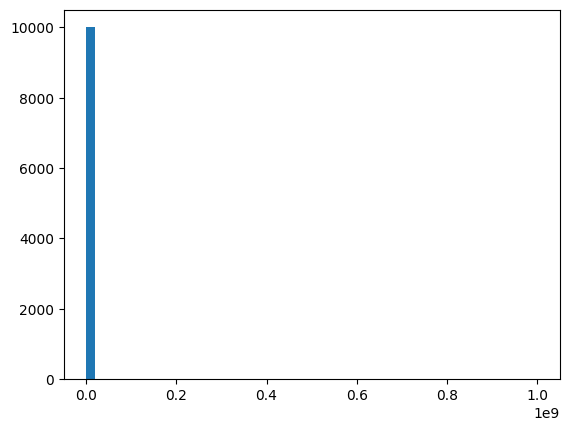

In [14]:
%matplotlib inline
import numpy as np

# Gera uma distribuição normal (Gaussiana) de dados de renda
incomes = np.random.normal(27000, 15000, 10000)
incomes = np.append(incomes, [1000000000]) # Adiciona um valor anômalo (outlier) significativo aos dados de renda

import matplotlib.pyplot as plt
plt.hist(incomes, 50) # Plota um histograma dos dados de renda
plt.show()

In [15]:
incomes.mean() # calculando a media 

127023.22415544657

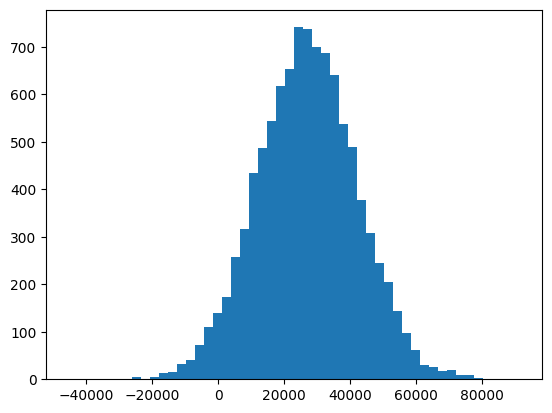

In [16]:
def reject_outliers(data):
    u = np.median(data) # mediana 
    s = np.std(data) # desvio padrão
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)] # Filtra os dados, mantendo apenas os valores que estão dentro de 2 desvios padrão da mediana
    return filtered # Retorna a lista de dados filtrados

# Aplica a função de rejeição de outliers aos dados de renda
filtered = reject_outliers(incomes)

plt.hist(filtered, 50) # Plota um histograma dos dados de renda filtrados
plt.show()

In [17]:
np.mean(filtered) # calculando a media

27035.926477862115